In [46]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

(9959, 9958)


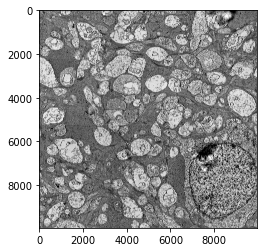

In [26]:
datadir = '../data/complex/train'
datapaths = os.listdir(datadir)
datapath = os.path.join(datadir, datapaths[0])
image = plt.imread(datapath)[...,0]
print(image.shape)
plt.imshow(image, vmax=1, cmap='gray')
plt.show()

In [13]:
num = 700 - 184
min_ = 1000000
while num < 1500:
    a = 9958 % num
    if a != 0:
        a = num - a
    if a < min_:
        min_ = a
        best = num
    num += 16
print(best, min_)

996 2


In [42]:
class cutter():
    def __init__(self, out_size, image_shape, pad=184):
        self.out_size = out_size
        self.shape = image_shape
        
        self.left_pad = int(pad / 2)
        self.right_pad = int(pad / 2 + (out_size-self.shape[1]) % out_size)
        self.up_pad = int(pad / 2)
        self.down_pad = int(pad / 2 + (out_size-self.shape[0]) % out_size)
        self.pad = int(pad / 2)
        
        self.h_iters = int(np.ceil(self.shape[0] / out_size))
        self.w_iters = int(np.ceil(self.shape[1] / out_size))
        
    def cut(self, image):
        image = np.pad(image, ((self.up_pad, self.down_pad), (self.left_pad, self.right_pad)), 'symmetric')
        imgs = []
        for i in range(self.h_iters):
            for j in range(self.w_iters):
                u = self.out_size * i + self.pad
                l = self.out_size * j + self.pad
                r = l + self.out_size
                d = u + self.out_size
                imgs.append(image[u-self.pad:d+self.pad, l-self.pad:r+self.pad])
        return imgs
        
    def stick(self, imgs):
        image = np.zeros(self.shape)
        for i in range(self.h_iters):
            for j in range(self.w_iters):
                index = j + i * self.w_iters
                u = self.out_size * i
                l = self.out_size * j
                r = min(l + self.out_size, self.shape[1])
                d = min(u + self.out_size, self.shape[0])
                image[u:d, l:r] = imgs[index][self.pad:self.pad+d-u,self.pad:self.pad+r-l]
        
        return image

In [35]:
shape = [9959, 9958]
out_size = 996
(out_size-shape[1]) % out_size

2

(10144, 10144)


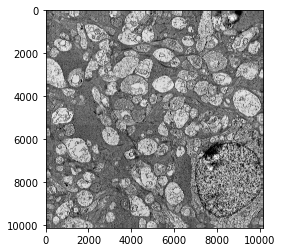

In [20]:
image_pad = np.pad(image, ((92, 93), (92, 94)), 'symmetric')
print(image_pad.shape)
plt.imshow(image_pad, cmap='gray')
plt.show()

In [43]:
cutter_ = cutter(996, image.shape)
imgs = np.array(cutter_.cut(image))
image_recover = cutter_.stick(imgs)

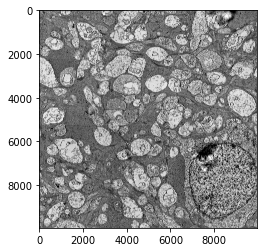

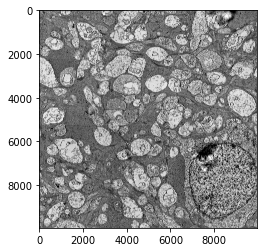

0.0


In [45]:
plt.imshow(image, cmap='gray')
plt.show()
plt.imshow(image_recover, cmap='gray')
plt.show()
print(np.sum((image-image_recover)**2))